In [70]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

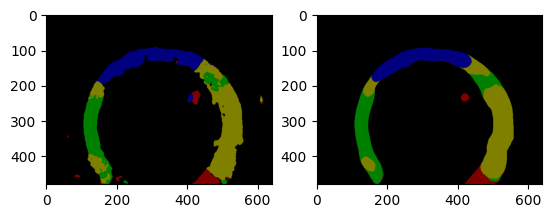

In [71]:
img_orin = cv2.imread("./dataSet/img_train/img0_20240924_161825_res.png")
img_orin2 = img_orin[:, :, ::-1]
plt.subplot(121)
plt.imshow(img_orin2)
img = cv2.imread("./dataSet/img_train/img0_20240924_161825_res_gray.png")
#灰度图开运算：腐蚀-->膨胀
# kernel=cv2.getStructuringElement(cv2.MORPH_RECT,(20,20))
# img_Ex=cv2.morphologyEx(img,cv2.MORPH_OPEN,kernel)
img_Ex = cv2.medianBlur(img, 37)
colors = [(0, 0, 0), (128, 0, 0), (0, 128, 0), (128, 128, 0), (0, 0, 128)]
# 用 numpy 矩阵存储输入图像
img_array = np.array(img_Ex)
chosen_labels = np.unique(img_Ex)
chosen_colors = [colors[label] for label in chosen_labels]
#  新建一个RGB （height,width,channel=3）
color_mask = np.zeros((img_Ex.shape[0], img_Ex.shape[1], 3), dtype=np.uint8)
for i, label in enumerate(chosen_labels):
    if label != 0:
        idx = np.nonzero(img_array == label)
        color_mask[idx[0], idx[1]] = chosen_colors[i]
color_mask = cv2.cvtColor(color_mask, cv2.COLOR_BGR2RGB)
color_mask2 = color_mask[:, :, ::-1]
plt.subplot(122)
plt.imshow(color_mask2)
# img_color

In [72]:

img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

_, img_b1 = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY)
_, img_b2 = cv2.threshold(img, 1, 255, cv2.THRESH_BINARY)
_, img_b3 = cv2.threshold(img, 2, 255, cv2.THRESH_BINARY)
_, img_b4 = cv2.threshold(img, 3, 255, cv2.THRESH_BINARY)

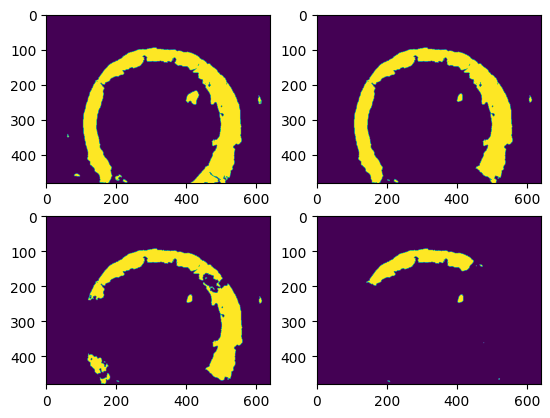

In [73]:
plt.subplot(2, 2, 1)
plt.imshow(img_b1)
plt.subplot(2, 2, 2)
plt.imshow(img_b2)
plt.subplot(2, 2, 3)
plt.imshow(img_b3)
plt.subplot(2, 2, 4)
plt.imshow(img_b4)

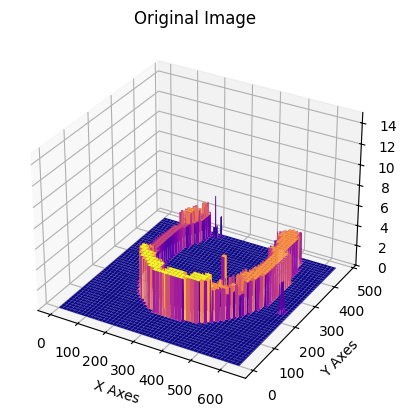

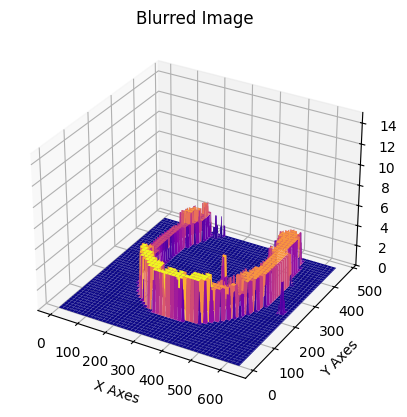

In [74]:
from mpl_toolkits.mplot3d import axes3d
from matplotlib import colors

# 假设 img 是你原始的图片
img_blur = cv2.GaussianBlur(img, (5, 5), 1.1, 1.1)
img_blur = cv2.sepFilter2D(img_blur, -1, cv2.getGaussianKernel(5, 1.1), cv2.getGaussianKernel(5, 1.1))
# 创建第一个图：显示原始图像的三维图
fig1 = plt.figure()
ax1 = fig1.add_subplot(111, projection='3d')

# 标签
ax1.set_xlabel('X Axes')
ax1.set_ylabel('Y Axes')
ax1.set_zlabel('Z Axes')
ax1.set_zlim(0, 15)

# 生成网格并绘制原始图像的三维表面
x = np.arange(img.shape[1])
y = np.arange(img.shape[0])
x, y = np.meshgrid(x, y)
z = img

ax1.plot_surface(x, y, z, cmap='plasma')
ax1.set_title("Original Image")

# 创建第二个图：显示模糊图像的三维图
fig2 = plt.figure()
ax2 = fig2.add_subplot(111, projection='3d')

# 标签
ax2.set_xlabel('X Axes')
ax2.set_ylabel('Y Axes')
ax2.set_zlabel('Z Axes')
ax2.set_zlim(0, 15)

# 生成网格并绘制模糊后的图像的三维表面
z_blur = img_blur
ax2.plot_surface(x, y, z_blur, cmap='plasma')
ax2.set_title("Blurred Image")

# 显示图形
plt.show()

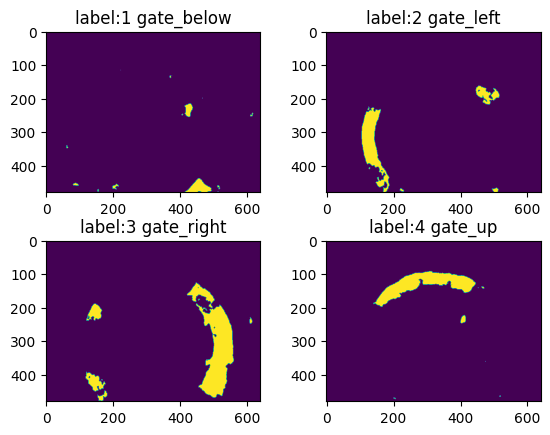

In [75]:
img_b1_np = img_b1 - img_b2
img_b2_np = img_b2 - img_b3
img_b3_np = img_b3 - img_b4
img_b4_np = img_b4

fig, axes = plt.subplots(2, 2)
axes[0, 0].imshow(img_b1_np)
axes[0, 0].set_title("label:1 gate_below")
axes[0, 1].imshow(img_b2_np)
axes[0, 1].set_title("label:2 gate_left")
axes[1, 0].imshow(img_b3_np)
axes[1, 0].set_title("label:3 gate_right")
axes[1, 1].imshow(img_b4_np)
axes[1, 1].set_title("label:4 gate_up")

fig.subplots_adjust(wspace=0.3, hspace=0.3)

In [76]:
# kernel=cv2.getStructuringElement(cv2.MORPH_RECT,(10,10))
# img_b1_np=cv2.morphologyEx(img_b1_np,cv2.MORPH_DILATE,kernel)
# img_b2_np=cv2.morphologyEx(img_b2_np,cv2.MORPH_DILATE,kernel)
# img_b3_np=cv2.morphologyEx(img_b3_np,cv2.MORPH_DILATE,kernel)
# img_b4_np=cv2.morphologyEx(img_b4_np,cv2.MORPH_DILATE,kernel)

# fig,axes = plt.subplots(2,2)
# axes[0,0].imshow(img_b1_np)
# axes[0,0].set_title("label:1 gate_below")
# axes[0,1].imshow(img_b2_np)
# axes[0,1].set_title("label:2 gate_left")
# axes[1,0].imshow(img_b3_np)
# axes[1,0].set_title("label:3 gate_right")
# axes[1,1].imshow(img_b4_np)
# axes[1,1].set_title("label:4 gate_up")

# fig.subplots_adjust(wspace=0.3,hspace=0.3)

In [77]:
corners = []
def getContour(img):
    # OpenCV定义的结构元素
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))
    # 腐蚀图像
    #     img = cv2.erode(img, kernel)
    # 膨胀图像
    # 高斯滤波
    contours, _ = cv2.findContours(img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    area = []
    area_sel = []
    img_contours = np.zeros([480, 640], np.uint8)
    for i in range(len(contours)):
        area.append(cv2.contourArea(contours[i]))
    contours_max = np.argmax(np.array(area))
    main_contour = contours[contours_max]
    #     print(main_contour)
    cv2.drawContours(img_contours, contours, contours_max, 255, cv2.FILLED)
    M = cv2.moments(main_contour)
    if M["m00"] != 0:
        cx = int(M["m10"] / M["m00"])
        cy = int(M["m01"] / M["m00"])
        corners.append((cx,cy))
    # distance_threshold = 20
    # # 遍历所有轮廓并筛选距离小于20的点
    # for i in range(len(contours)):
    #     if i == contours_max:
    #         continue  # 跳过最大面积轮廓
    #     min_distance = np.inf  # 初始化最短距离
    #     for point1 in contours[i]:
    #         x1, y1 = point1[0]
    #         for point2 in main_contour:
    #             x2, y2 = point2[0]
    #             distance = np.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)
    #             min_distance = min(min_distance, distance)
    #     if min_distance < distance_threshold:
    #         area_sel.append(contours[i])
    #         break  # 一旦找到符合条件的点，就加入并跳出内循环    
    # 
    # # 绘制选定的轮廓
    # cv2.drawContours(img_contours, area_sel, -1, 255, cv2.FILLED)
    return img_contours

[(455, 464), (137, 337), (512, 332), (292, 132)]


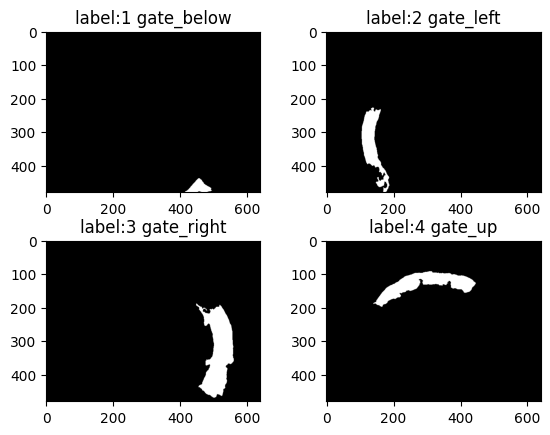

In [78]:
img_b1_MaxContour = cv2.cvtColor(getContour(img_b1_np), cv2.COLOR_GRAY2RGB)
img_b2_MaxContour = cv2.cvtColor(getContour(img_b2_np), cv2.COLOR_GRAY2RGB)
img_b3_MaxContour = cv2.cvtColor(getContour(img_b3_np), cv2.COLOR_GRAY2RGB)
img_b4_MaxContour = cv2.cvtColor(getContour(img_b4_np), cv2.COLOR_GRAY2RGB)

print(corners)

fig, axes = plt.subplots(2, 2)
axes[0, 0].imshow(img_b1_MaxContour)
axes[0, 0].set_title("label:1 gate_below")
axes[0, 1].imshow(img_b2_MaxContour)
axes[0, 1].set_title("label:2 gate_left")
axes[1, 0].imshow(img_b3_MaxContour)
axes[1, 0].set_title("label:3 gate_right")
axes[1, 1].imshow(img_b4_MaxContour)
axes[1, 1].set_title("label:4 gate_up")

fig.subplots_adjust(wspace=0.3, hspace=0.3)

In [79]:
def changePixelValue(img, src, dst):
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if img[i, j] == src:
                img[i, j] = dst
    return img

In [80]:
img1 = changePixelValue(getContour(img_b1_np), 255, 1)
img2 = changePixelValue(getContour(img_b2_np), 255, 2)
img3 = changePixelValue(getContour(img_b3_np), 255, 3)
img4 = changePixelValue(getContour(img_b4_np), 255, 4)

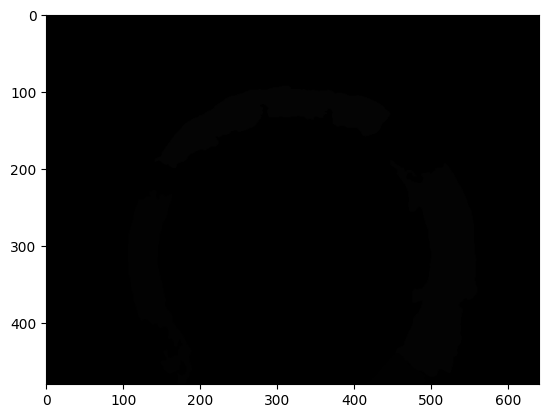

In [81]:
img_end = img1 + img2 + img3 + img4
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))
img_end = cv2.dilate(img_end, kernel)
# img_end = cv2.GaussianBlur(img_end, (5, 5), 0)
img_end = cv2.cvtColor(img_end, cv2.COLOR_GRAY2RGB)
plt.imshow(img_end)

In [85]:
img_array = np.array(img_end)
chosen_labels = np.unique(img_end)
colors = [(0, 0, 0), (128, 0, 0), (0, 128, 0), (128, 128, 0), (0, 0, 128), 0, 0, 0, 0, 0, (255, 255, 255)]
chosen_colors = [colors[label] for label in chosen_labels]
#  新建一个RGB （height,width,channel=3）
color_end_mask = np.zeros((img_end.shape[0], img_end.shape[1], 3), dtype=np.uint8)
for i, label in enumerate(chosen_labels):
    if label != 0:
        idx = np.nonzero(img_array == label)
        color_end_mask[idx[0], idx[1]] = chosen_colors[i]
img_orin = cv2.cvtColor(img_orin, cv2.COLOR_BGR2RGB)
for i in corners:
    cv2.circle(img_orin, (corners[i][0], corners[i][1]), 2, (255,255,255), 2)
plt.subplot(1, 2, 2)
plt.imshow(color_end_mask)
plt.subplot(1, 2, 1)
plt.imshow(img_orin)

TypeError: list indices must be integers or slices, not tuple